<a href="https://colab.research.google.com/github/Jon227student/IS_170_Machine_Learning/blob/9.-Regression-Models/Lab_9_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonathan Schultz Lab 9 Regression models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/credit_customers.csv')

In [ ]:
df.head(15)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,...,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,...,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,...,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,...,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,...,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [ ]:
df['class'] = df['class'].replace({'good': 1, 'bad': 2})
df['own_telephone'] = df['own_telephone'].replace({'none': 2, 'yes': 1})
df.to_csv('/content/credit_customers.csv', index=False)

df.head(10)

,class,num_dependents,own_telephone,existing_credits
0,1,1.0,1,2.0
1,2,1.0,2,1.0
2,1,2.0,2,1.0
3,1,2.0,2,1.0
4,2,2.0,2,2.0
5,1,2.0,1,1.0
6,1,1.0,2,1.0
7,1,1.0,1,1.0
8,1,1.0,2,1.0
9,2,1.0,2,2.0


In [ ]:
df = df[['class','num_dependents','own_telephone','existing_credits']].dropna()

In [ ]:
df.head(10)

,class,num_dependents,own_telephone,existing_credits
0,1,1.0,1,2.0
1,2,1.0,2,1.0
2,1,2.0,2,1.0
3,1,2.0,2,1.0
4,2,2.0,2,2.0
5,1,2.0,1,1.0
6,1,1.0,2,1.0
7,1,1.0,1,1.0
8,1,1.0,2,1.0
9,2,1.0,2,2.0


In [ ]:
x_values = df[['num_dependents','own_telephone','existing_credits']].values
y_values = df['class'].values

print(x_values[0], y_values[0])

[1. 1. 2.] 1


In [ ]:
degree=2

In [ ]:
poly_model = PolynomialFeatures(2)

In [ ]:
poly_x_values = poly_model.fit_transform(x_values)

In [ ]:
print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [1. 1. 2.]
Mapped to [1. 1. 1. 2. 1. 1. 2. 1. 2. 4.]


In [ ]:
poly_model.fit(poly_x_values, y_values)

PolynomialFeatures()

In [ ]:
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)

LinearRegression()

In [ ]:
y_pred = regression_model.predict(poly_x_values)
regression_model.coef_

array([ 0.00000000e+00,  3.53296282e+13,  2.84504085e+12,  3.12500000e-02,
       -1.17765427e+13,  1.89453125e-01, -2.63671875e-02, -9.48346949e+11,
       -5.02929688e-02,  1.56250000e-02])

In [ ]:
mean_squared_error(y_values, y_pred, squared=False)

0.45684536484233884

In [ ]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

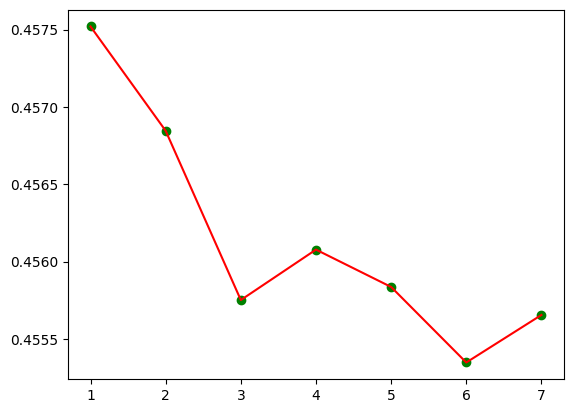

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

My model is shown to have my predicted value .45 away from the true value. So it still seems to be very innacurate. I do not think standardizing my data would help since all inputed data are over 1 and under 2. This model was created to analyze variables regarding a customer and predict whether the customer's credit was good or bad. 